<a href="https://colab.research.google.com/github/klangner/tensorflow-sandbox/blob/master/collab/tf2-tutorials/basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train your first neural network: basic classification

In [1]:
!pip install tensorflow==2.0.0-beta1

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


## Load data 

We will Fasion Mnist dataset here. We can load it from Keras.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(f'Training {train_images.shape}, {len(train_labels)}')
print(f'Testing {test_images.shape}')


Training (60000, 28, 28), 60000
Testing (10000, 28, 28)


## Preprocess data

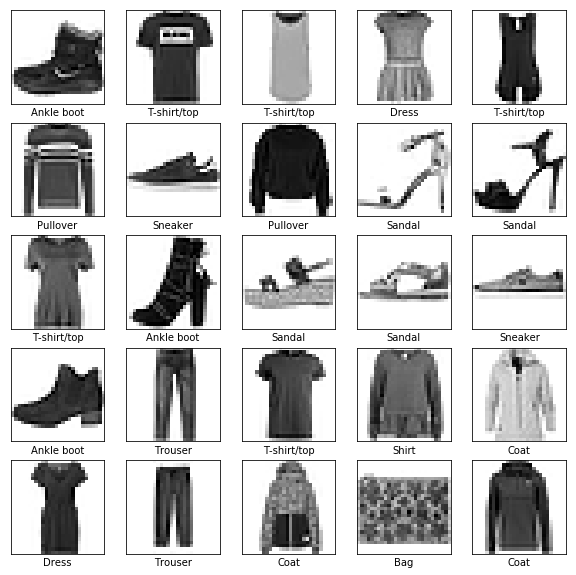

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train model

In [9]:
model.fit(train_images, train_labels, epochs=10)

W0727 11:11:55.175936 139861052905344 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5025 - accuracy: 0.8239
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3761 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3402 - accuracy: 0.8768
Epoch 4/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3137 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2970 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2821 - accuracy: 0.8954
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2702 - accuracy: 0.8992
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2591 - accuracy: 0.9032
Epoch 9/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2490 - accuracy: 0.9077
Epoch 10/10
60

## Evaluate accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

print('\nTest accuracy:', test_acc)
print('Prediction of the first example: {}'.format(class_names[np.argmax(predictions[0])]))

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3389 - accuracy: 0.8798

Test accuracy: 0.8798
Prediction of first example Ankle boot


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

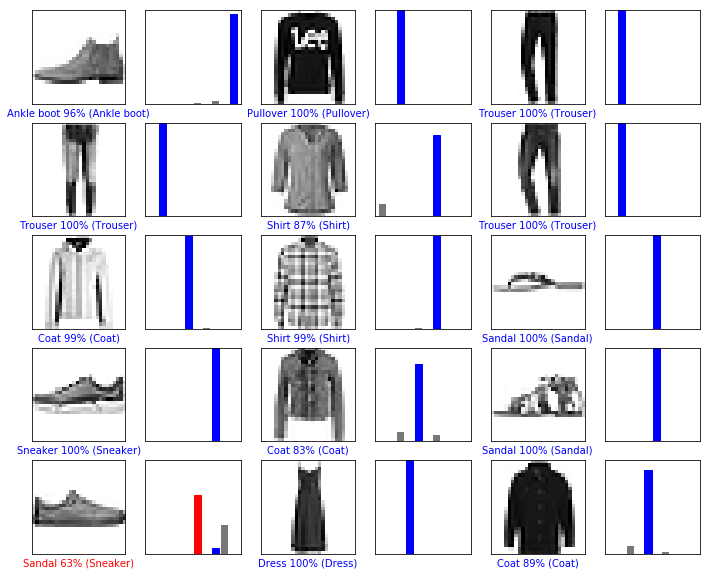

In [14]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()